In [41]:
import bs4 as bs
import urllib.request
import re
import nltk
import numpy as np

In [26]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""
for p in paragraphs:
    article_text += p.text
    
article_text

'\n\nIn computer science, artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans. Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.[1] Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".[2]\nAs machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.[3] A quip in Tesler\'s Theorem says "AI is whatever hasn\'t been done yet."[4] For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.

I convert all the text to lowercase and then remove all the digits, special characters, and extra spaces from the text.<br> Then i eliminate the stop words

In [27]:
# Cleaing the text
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [35]:
from gensim.models import Word2Vec

word2vec = Word2Vec(all_words,min_count=2,size= 100,workers=3, window =5, sg = 0)

Let’s try to understand the hyperparameters of this model.
<ul><li><strong>size: </strong>The number of dimensions of the embeddings and the default is 100.</li><li><strong>window: </strong>The maximum distance between a target word and words around the target word. The default window is 5.</li><li><strong>min_count: </strong>The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.</li><li><strong>workers: </strong>The number of partitions during training and the default workers is 3.</li><li><strong>sg: </strong>The specific architecture, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.</li></ul>

In [29]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'computer': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45508>, 'science': <gensim.models.keyedvectors.Vocab object at 0x0000021454F455C8>, 'artificial': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45788>, 'intelligence': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45848>, 'ai': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45948>, 'sometimes': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45AC8>, 'called': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45B08>, 'machine': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45C08>, 'demonstrated': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45908>, 'machines': <gensim.models.keyedvectors.Vocab object at 0x0000021454F459C8>, 'contrast': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45D48>, 'natural': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45DC8>, 'displayed': <gensim.models.keyedvectors.Vocab object at 0x0000021454F45E08

In [36]:
v1 = word2vec.wv['artificial']
v1

array([ 1.94221118e-03, -4.36180364e-03,  2.18223711e-03, -5.46888215e-03,
        5.80843166e-03, -7.80075602e-03, -2.55352305e-03,  7.66998483e-03,
        5.00867888e-03, -3.54591617e-03, -4.35555773e-03, -3.00400169e-03,
        4.77779657e-03,  1.83867640e-03,  1.16427541e-02, -1.11260789e-03,
        5.41562587e-03,  4.57130000e-03,  2.94241775e-03,  3.71318706e-03,
       -2.04586098e-03, -1.49173592e-03,  4.74614277e-03, -6.36696070e-03,
        3.34969419e-03,  1.13941217e-03,  1.93328178e-03,  7.07498658e-03,
       -4.65184730e-03,  1.65544497e-03,  7.35848385e-04, -3.42272338e-03,
        1.06828120e-02, -2.52839574e-03,  5.29162679e-03,  8.15866981e-03,
       -2.46121502e-03, -5.54084778e-03,  7.90982507e-04,  2.22594637e-04,
        3.14887520e-03,  2.51196860e-03,  2.52373493e-03, -5.69608994e-03,
        3.84714943e-03,  5.11516118e-03, -7.19893305e-03,  2.52774823e-03,
       -3.65418149e-03, -1.18241273e-03,  8.78360122e-04, -1.24863815e-03,
        3.39941331e-03,  

In [38]:
word2vec.wv.most_similar('intelligence')

[('used', 0.6839380860328674),
 ('ai', 0.659732460975647),
 ('learning', 0.6490275859832764),
 ('many', 0.6297904253005981),
 ('would', 0.6289142370223999),
 ('human', 0.6278395652770996),
 ('artificial', 0.620753288269043),
 ('humans', 0.6134840250015259),
 ('machine', 0.6110624074935913),
 ('could', 0.6100116968154907)]

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(15,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.0001, y+0.0001, word)

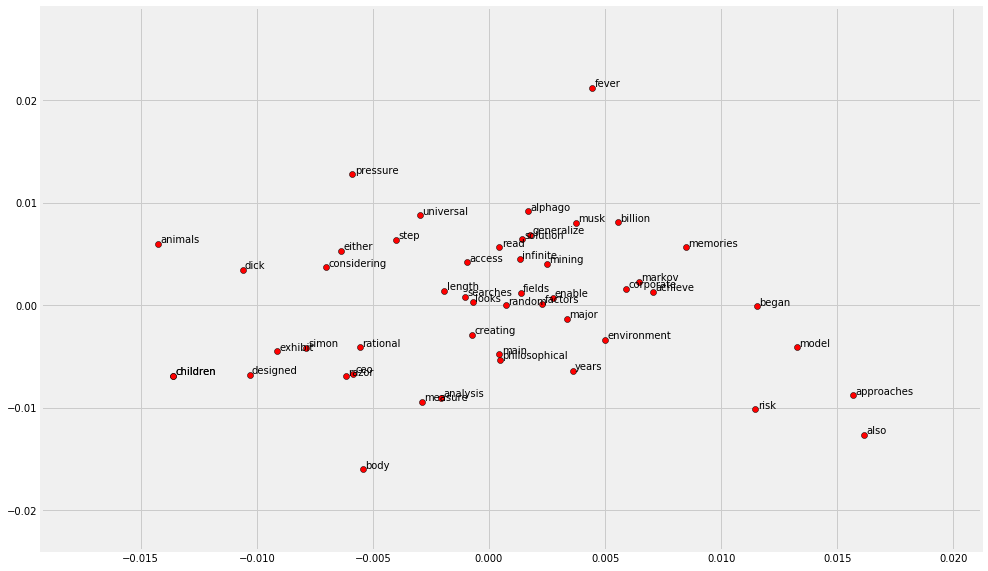

In [69]:
%matplotlib inline
display_pca_scatterplot(word2vec.wv, sample=50)